In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import itertools
import time
from datetime import datetime

In [69]:
#reading in data
hotels = pd.read_csv('Hotel Reservations.csv')
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [70]:
# Mapping response to 0 (Not Canceled) and 1 (Canceled)
hotels['booking_status'].replace(['Canceled', 'Not_Canceled'],[1, 0], inplace=True)

In [71]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [72]:
# Split train and test datasets
y = hotels.booking_status
X = hotels.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)
train, test = train_test_split(hotels, test_size=0.25, random_state=25, shuffle=True, stratify=y)

# Developing Baseline Model

In [73]:
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
12547,INN12548,2,0,0,3,Meal Plan 1,0,Room_Type 1,9,2018,4,20,Offline,0,0,0,95.0,0,0
17799,INN17800,3,0,0,3,Meal Plan 1,0,Room_Type 1,85,2018,12,8,Offline,0,0,0,105.0,0,0
28038,INN28039,2,0,1,0,Meal Plan 1,0,Room_Type 4,0,2018,8,29,Online,0,0,0,164.0,0,0
17867,INN17868,1,0,0,1,Not Selected,0,Room_Type 1,35,2018,11,23,Online,0,0,0,88.0,2,0
32145,INN32146,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2018,3,16,Corporate,1,1,4,65.0,1,0


In [126]:
#Baseline model
baseline_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+no_of_week_nights+\
type_of_meal_plan+required_car_parking_space+room_type_reserved+lead_time+arrival_year+\
arrival_month+arrival_date+market_segment_type+repeated_guest+no_of_previous_bookings_not_canceled+\
avg_price_per_room+no_of_special_requests', data = train).fit()
baseline_model.summary()

         Current function value: 0.424982
         Iterations: 35


/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27179
Method:                           MLE   Df Model:                           26
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.3281
Time:                        13:25:01   Log-Likelihood:                -11562.
converged:                      False   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -844.9969    116.842     -7.232      0.000   -1074.003    -615.991
type_of_meal_plan[T.Meal Plan 2]         0.2001      0.065      3.083      0.002       0.073       0.327
type_of_meal_plan[T.Meal Plan 3]        16.7072   2886.181      0.006      0.995   -5640.104    5673.519
type_of_meal_plan[T.Not Selected]        0.2557      0.051      4.996      0.000       0.155       0.356
room_type_reserved[T.Room_Type 2]       -0.4717      0.130     -3.629      0.000      -0.726      -0.217
room_type_reserved[T.Room_Type 3]       -0.2428      1.361     -0.178      0.858      -2.911       2.426
room_type_reserved[T.Room_Type 4]       -0.2692      0.051     -5.236      0.000      -0.370      -0.168
room_type_reserved[T.Room_Type 5]       -0.6821      0.197     -3.466      0.001      -1.068      -0.296
room_type_reserved[T.Room_Type 6]       -0.9092      0.144     -6.299      0.000      -1.192      -0.626
room_type_reserved[T.Room_Type 7]       -1.3521      0.291     -4.644      0.000      -1.923      -0.781
market_segment_type[T.Complementary]   -28.5560   3562.103     -0.008      0.994   -7010.149    6953.037
market_segment_type[T.Corporate]        -1.1438      0.256     -4.464      0.000      -1.646      -0.642
market_segment_type[T.Offline]          -2.0718      0.246     -8.432      0.000      -2.553      -1.590
market_segment_type[T.Online]           -0.3039      0.243     -1.253      0.210      -0.779       0.172
no_of_adults                             0.0798      0.037      2.185      0.029       0.008       0.151
no_of_children                           0.1164      0.057      2.047      0.041       0.005       0.228
no_of_weekend_nights                     0.1391      0.019      7.259      0.000       0.102       0.177
no_of_week_nights                        0.0338      0.012      2.856      0.004       0.011       0.057
required_car_parking_space              -1.5129      0.131    -11.512      0.000      -1.770      -1.255
lead_time                                0.0157      0.000     61.042      0.000       0.015       0.016
arrival_year                             0.4175      0.058      7.211      0.000       0.304       0.531
arrival_month                           -0.0420      0.006     -6.718      0.000      -0.054      -0.030
arrival_date                             0.0010      0.002      0.509      0.611      -0.003       0.005
repeated_guest                          -1.7281      0.418     -4.133      0.000      -2.548      -0.909
no_of_previous_bookings_not_canceled    -0.0642      0.098     -0.654      0.513      -0.257       0.128
avg_price_per_room                       0.0185      0.001     26.090      0.000       0.017       0.020
no_of_special_requests                  -1.4731      0.029    -50.524      0.000      -1.530      -1.416
===========================================================================================

In [127]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

In [128]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_accuracy(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    return accuracy

0.8070278615011395 0.45


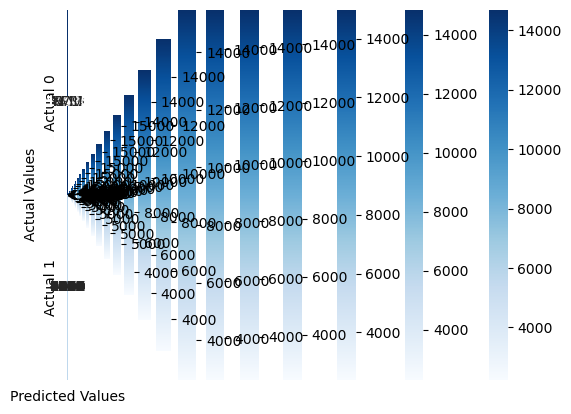

In [129]:
#Calculating best model accuracy and best cutoff 
best_accuracy = 0
best_cutoff = None

for cutoff in range(35,70):
    cutoff = cutoff / 100
    accuracy = confusion_matrix_accuracy(train, train.booking_status, baseline_model, cutoff = cutoff)
    
    if(accuracy >= best_accuracy):
        best_accuracy = accuracy
        best_cutoff = cutoff
        
print(best_accuracy, best_cutoff)

Classification accuracy = 80.7%
Precision = 71.7%
TPR or Recall = 67.8%
FNR = 32.2%
FPR = 13.0%
ROC-AUC = 86.3%


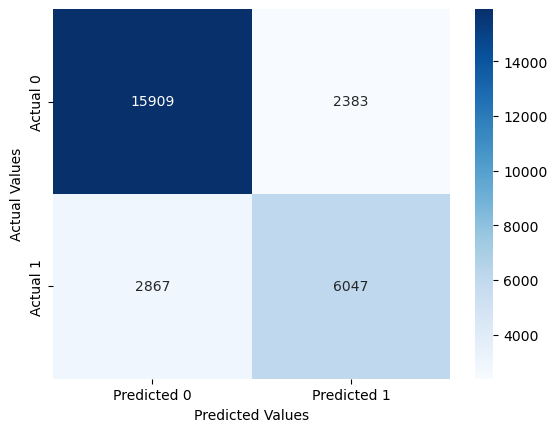

In [130]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model, cutoff = best_cutoff)

Classification accuracy = 80.9%
Precision = 72.1%
TPR or Recall = 68.2%
FNR = 31.8%
FPR = 12.9%
ROC-AUC = 86.5%


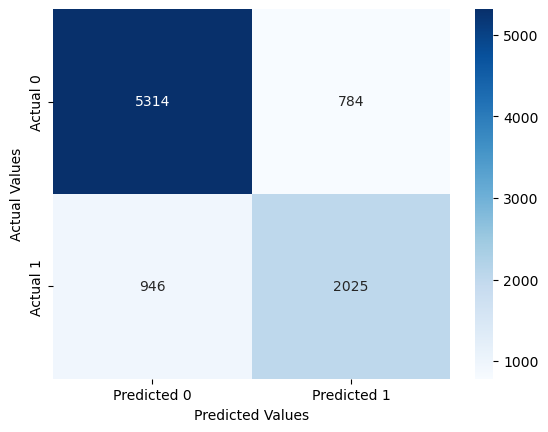

In [131]:
#matrix for test data
confusion_matrix_data(test, test.booking_status, baseline_model, cutoff = best_cutoff)

# Dummy Variables

In [78]:
# playing without dummy - use the original data instead of dummy

In [79]:
# Convert categorical variables to dummies and append to df 
dummy_market = pd.get_dummies(hotels.market_segment_type)
dummy_month = pd.get_dummies(hotels.arrival_month)
dummy_meal = pd.get_dummies(hotels.type_of_meal_plan)
dummy_room = pd.get_dummies(hotels.room_type_reserved)

hotels_dummy = pd.concat([hotels, dummy_market.drop('Aviation', axis = 1), dummy_month.drop(4, axis = 1), dummy_meal.drop('Meal Plan 3', axis = 1), dummy_room.drop('Room_Type 7', axis = 1)], axis = 1)
hotels_dummy.columns = hotels_dummy.columns.astype(str)
hotels_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,12,Meal Plan 1,Meal Plan 2,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [80]:
# Split train and test datasets with dummies
y = hotels_dummy.booking_status
X = hotels_dummy.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)
train, test = train_test_split(hotels_dummy, test_size=0.25, random_state=25, shuffle=True, stratify=y)

In [81]:
#extracting 2017 arrivals
svnteen_train = train[train['arrival_year'] == 2017]

svnteen_date = svnteen_train.groupby(hotels.arrival_date)
#extracting 2018 arrivals 
eiteen_train = train[train['arrival_year'] == 2018]

In [82]:
# Logistic regression model with dummy variables 
logit_model = sm.logit('booking_status~no_of_special_requests+lead_time+no_of_weekend_nights+\
no_of_weekend_nights*no_of_week_nights+no_of_previous_cancellations+\
no_of_previous_cancellations*no_of_previous_bookings_not_canceled+\
avg_price_per_room+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.466740
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2621
Time:                        12:57:36   Log-Likelihood:                -12698.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            -5.3078      0.219    -24.260      0.000      -5.737      -4.879
no_of_special_requests                                               -1.1114      0.025    -43.971      0.000      -1.161      -1.062
lead_time                                                             0.0128      0.000     60.957      0.000       0.012       0.013
no_of_weekend_nights                                                  0.0570      0.029      1.957      0.050   -7.46e-05       0.114
no_of_week_nights                                                    -0.0403      0.018     -2.266      0.023      -0.075      -0.005
no_of_weekend_nights:no_of_week_nights                                0.0514      0.008      6.391      0.000       0.036       0.067
no_of_previous_cancellations                                         -0.0281      0.076     -0.372      0.710      -0.177       0.120
no_of_previous_bookings_not_canceled                                 -0.8272      0.232     -3.572      0.000      -1.281      -0.373
no_of_previous_cancellations:no_of_previous_bookings_not_canceled     0.0699      0.025      2.810      0.005       0.021       0.119
avg_price_per_room                                                    0.0327      0.002     17.493      0.000       0.029       0.036
no_of_adults                                                          0.9525      0.108      8.789      0.000       0.740       1.165
avg_price_per_room:no_of_adults                                      -0.0065      0.001     -7.368      0.000      -0.008      -0.005
no_of_children                                                        0.7450      0.116      6.421      0.000       0.518       0.972
avg_price_per_room:no_of_children                                    -0.0050      0.001     -6.921      0.000      -0.006      -0.004
=====================================================================================================================================
"""

In [83]:
predictions_17 = logit_model.predict(svnteen_train)
#predictions_17 = (predictions_17>best_cutoff).astype(int)
predictions_17

24137    0.078707
11973    0.087020
31685    0.104457
6664     0.296757
219      0.363072
           ...   
31365    0.790247
13425    0.500221
31046    0.826509
6397     0.032906
4824     0.323806
Length: 4874, dtype: float64

<AxesSubplot:ylabel='booking_status'>

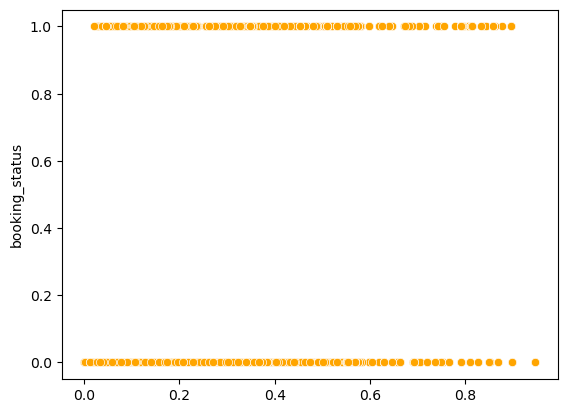

In [84]:
sns.scatterplot(x=predictions_17, y=svnteen_train.booking_status, color="orange")
#I really think I'm graphing this wrong or approaching this the wrong way
#Next steps: graph time on X and residuals on y... but does graphing residuals of a binary response make sense??

In [85]:
cols=[hotels.arrival_year, hotels.arrival_month, hotels.arrival_date]
hotels['date'] = hotels.apply(lambda x: str(x.arrival_year) + "-" + str(x.arrival_month) + "-" + str(x.arrival_date), axis="columns")
hotels['date']=pd.to_datetime(hotels['date'], infer_datetime_format = True, errors="coerce")

# Autocorrelation attempts

Since logistic regression does not utilize residuals, we cannot really use autocorrelation. However, there might be some correlation between month with the number of cancellation, so we attempted to look into that relationship.

First, I want to look at the different months and see number of overall booking as well as the number of cancellation for each month

In [86]:
monthly_cancel = hotels.groupby(hotels.arrival_month).booking_status.value_counts()
monthly_cancel

arrival_month  booking_status
1              0                  990
               1                   24
2              0                 1274
               1                  430
3              0                 1658
               1                  700
4              0                 1741
               1                  995
5              0                 1650
               1                  948
6              0                 1912
               1                 1291
7              0                 1606
               1                 1314
8              0                 2325
               1                 1488
9              0                 3073
               1                 1538
10             0                 3437
               1                 1880
11             0                 2105
               1                  875
12             0                 2619
               1                  402
Name: booking_status, dtype: int64

In [107]:
# create DataFrame
monthly_cancel = pd.DataFrame({'Did not cancel': [990, 1274, 1658, 1741, 1650, 1912, 1606, 2325, 3073, 3437, 2105, 2619],
                   'Cancelled': [24, 430, 700, 995, 948, 1291, 1314, 1488, 1538, 1880, 875, 402]}, 
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
monthly_cancel

,Did not cancel,Cancelled
Jan,990,24
Feb,1274,430
Mar,1658,700
Apr,1741,995
May,1650,948
Jun,1912,1291
Jul,1606,1314
Aug,2325,1488
Sept,3073,1538
Oct,3437,1880


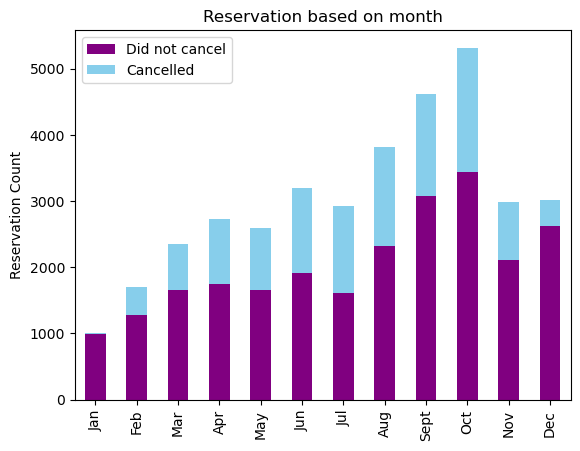

In [108]:
monthly_cancel.plot(kind='bar', stacked=True, color=['purple', 'skyblue'])
plt.ylabel("Reservation Count")
plt.title("Reservation based on month")
plt.show()

We can see that there are more hotel booking around August, September, and October. One way that we can explain this is that INN hotels is a decently cheap hotel and late August to mid October is pretty cheap off-season travel time so many people who want to save money will choose to travel during this time. However, this graph does not help us visualize the rate of cancellation for each month. Therefore I choose create another graph that shows the percentage of cancellation for each month.

In [109]:
monthly_cancel_percent = monthly_cancel.copy()
monthly_cancel_percent['Total'] = monthly_cancel_percent['Did not cancel'] + monthly_cancel_percent['Cancelled']
monthly_cancel_percent['Did not cancel percent'] = monthly_cancel_percent['Did not cancel']/monthly_cancel_percent['Total']
monthly_cancel_percent['Cancel percent'] = monthly_cancel_percent['Cancelled']/monthly_cancel_percent['Total']
monthly_cancel_percent = monthly_cancel_percent.drop(['Did not cancel', 'Cancelled', 'Total'], axis = 1)
monthly_cancel_percent.head()

,Did not cancel percent,Cancel percent
Jan,0.976331,0.023669
Feb,0.747653,0.252347
Mar,0.703138,0.296862
Apr,0.636330,0.363670
May,0.635104,0.364896


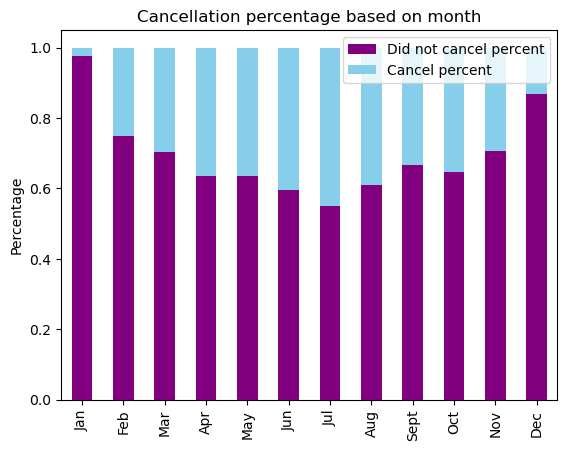

In [110]:
monthly_cancel_percent.plot(kind='bar', stacked=True, color=['purple', 'skyblue'])
plt.ylabel("Percentage")
plt.title('Cancellation percentage based on month')
sns.set_palette('pastel')
plt.show()

All of the months have a relatively similar rate of cancellation with the exception of January and December. July has a slightly higher rate of cancellation, but I don't think that it is too significant. Therefore, we can conclude that generally, even though there is a correlation between the totally number of reservations and the month of the year, there seems to be no correlation between the percentage of cancellation. 

In [91]:
hotels.corrwith(hotels.booking_status).sort_values(ascending = False)

booking_status                          1.000000
lead_time                               0.438538
arrival_year                            0.179529
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_children                          0.033078
arrival_date                            0.010629
arrival_month                          -0.011233
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
required_car_parking_space             -0.086185
repeated_guest                         -0.107287
no_of_special_requests                 -0.253070
dtype: float64

Since there are too many variables for me to even run forward or backward selection on my computer. I want to manually knockdown a few of the predictors. First I tried to just choose predictors that have a correlation with booking_status higher than 0.10

In [92]:
baseline_model1 = sm.logit('booking_status~avg_price_per_room+arrival_year+lead_time+no_of_special_requests+repeated_guest', data = train).fit()
baseline_model1.summary()

Optimization terminated successfully.
         Current function value: 0.464815
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27200
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2651
Time:                        12:57:39   Log-Likelihood:                -12646.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1953.1643     98.632    -19.803      0.000   -2146.479   -1759.850
avg_price_per_room         0.0171      0.000     34.183      0.000       0.016       0.018
arrival_year               0.9664      0.049     19.770      0.000       0.871       1.062
lead_time                  0.0124      0.000     60.161      0.000       0.012       0.013
no_of_special_requests    -1.0958      0.025    -43.852      0.000      -1.145      -1.047
repeated_guest            -2.3118      0.319     -7.238      0.000      -2.938      -1.686
==========================================================================================
"""

Classification accuracy = 76.4%
Precision = 83.4%
TPR or Recall = 34.7%
FNR = 65.3%
FPR = 3.4%
ROC-AUC = 83.1%


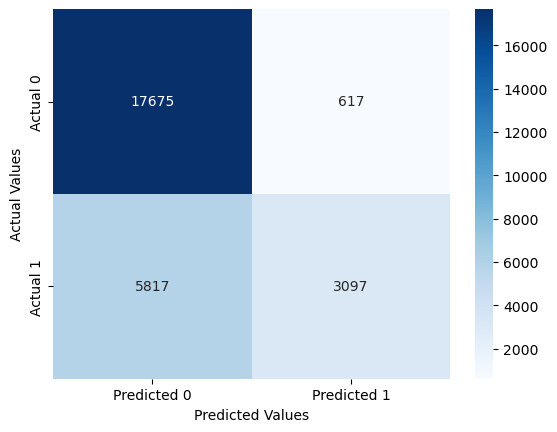

In [93]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model1, cutoff = best_cutoff)

Classification accuracy = 76.4%
Precision = 83.3%
TPR or Recall = 34.9%
FNR = 65.1%
FPR = 3.4%
ROC-AUC = 83.3%


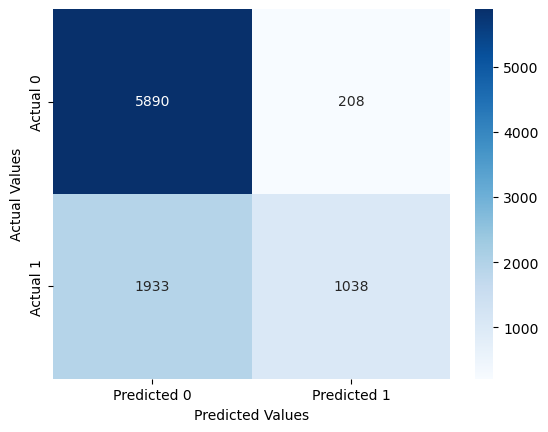

In [94]:
#matrix for train data
confusion_matrix_data(test, test.booking_status, baseline_model1, cutoff = best_cutoff)

This model is not as accurate as the model that we developed earlier. Furthermore, its false positive rate is also much higher so this model is not good. Since I looked at the hotel reservation trend over the years, I also to see if a model with just the arrival time would be any better. 

In [95]:
#Baseline model
baseline_model2 = sm.logit('booking_status~arrival_year+arrival_month', data = train).fit()
baseline_model2.summary()

Optimization terminated successfully.
         Current function value: 0.613393
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27203
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                 0.03021
Time:                        12:57:39   Log-Likelihood:                -16688.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                1.701e-226
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2625.6620     89.142    -29.455      0.000   -2800.378   -2450.946
arrival_year      1.3007      0.044     29.447      0.000       1.214       1.387
arrival_month     0.0389      0.004      8.798      0.000       0.030       0.048
=================================================================================
"""

/var/folders/qx/y6511cx14579xdbhwdbdj0jc0000gp/T/ipykernel_41281/2813583335.py:15: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


Classification accuracy = 67.2%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 60.0%


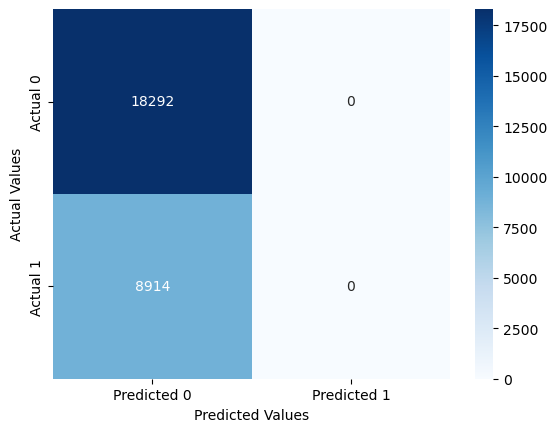

In [96]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model2, cutoff = best_cutoff)

/var/folders/qx/y6511cx14579xdbhwdbdj0jc0000gp/T/ipykernel_41281/2813583335.py:15: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


Classification accuracy = 67.2%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 60.0%


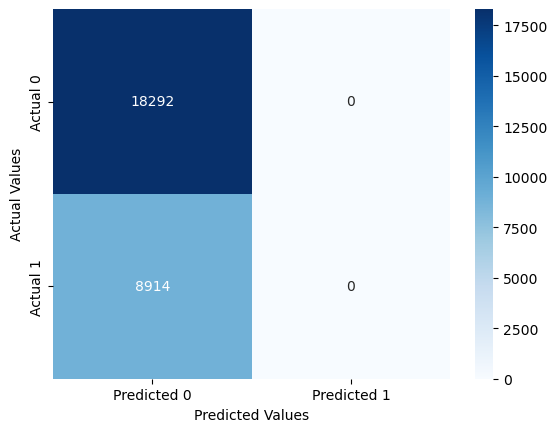

In [97]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model2, cutoff = 0.8)

Ideally I would not want to use this model because the FPR is way too high and also it's accuracy is significantly lower than that of our original model

# KNN

In [98]:
# Split train and test datasets
y = hotels_dummy.booking_status
X = hotels_dummy.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

In [99]:
## KNN with all predictors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

In [100]:
# KNN with features selected from forward and backward selection 
y = hotels_dummy.booking_status
X = hotels_dummy[['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
            'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 
            'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
knn = KNeighborsClassifier().fit(X_train, y_train)

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification accuracy = 87.2%
Precision = 84.9%
TPR or Recall = 74.1%
FNR = 25.9%
FPR = 6.4%
ROC-AUC = 83.8%


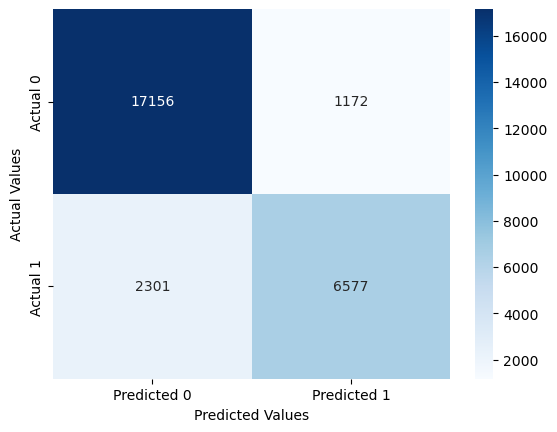

In [101]:
confusion_matrix_data(X_train, y_train, knn, cutoff = 0.4)

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification accuracy = 80.9%
Precision = 75.4%
TPR or Recall = 63.1%
FNR = 36.9%
FPR = 10.2%
ROC-AUC = 76.4%


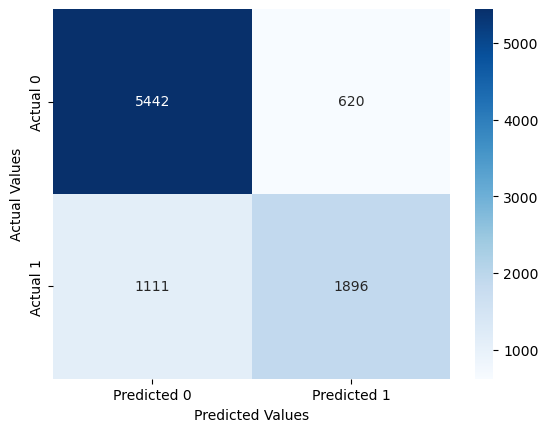

In [102]:
confusion_matrix_data(X_test, y_test, knn, cutoff = 0.4)

In [103]:
# Model1
model1 = sm.logit('booking_status~ no_of_adults+no_of_weekend_nights+no_of_week_nights+\
required_car_parking_space+lead_time+arrival_year+arrival_month+repeated_guest+no_of_previous_cancellations+\
avg_price_per_room+no_of_special_requests', data = train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.458765
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27194
Method:                           MLE   Df Model:                           11
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2747
Time:                        12:57:42   Log-Likelihood:                -12481.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1701.8897    105.527    -16.127      0.000   -1908.720   -1495.060
no_of_adults                     0.1776      0.033      5.451      0.000       0.114       0.241
no_of_weekend_nights             0.1859      0.018     10.261      0.000       0.150       0.221
no_of_week_nights                0.0447      0.011      3.973      0.000       0.023       0.067
required_car_parking_space      -1.2150      0.127     -9.588      0.000      -1.463      -0.967
lead_time                        0.0125      0.000     58.022      0.000       0.012       0.013
arrival_year                     0.8417      0.052     16.094      0.000       0.739       0.944
arrival_month                   -0.0305      0.006     -5.207      0.000      -0.042      -0.019
repeated_guest                  -2.4836      0.409     -6.080      0.000      -3.284      -1.683
no_of_previous_cancellations     0.1918      0.071      2.693      0.007       0.052       0.331
avg_price_per_room               0.0179      0.001     33.411      0.000       0.017       0.019
no_of_special_requests          -1.1179      0.026    -43.281      0.000      -1.169      -1.067
================================================================================================
"""

Classification accuracy = 77.5%
Precision = 66.1%
TPR or Recall = 66.2%
FNR = 33.8%
FPR = 16.9%
ROC-AUC = 83.5%


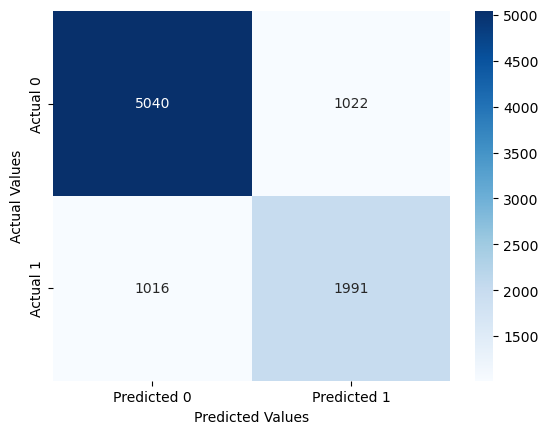

In [104]:
confusion_matrix_data(X_test, y_test, model1, cutoff = 0.4)

In [105]:
M = train[['no_of_adults','no_of_weekend_nights','no_of_week_nights',
'required_car_parking_space','lead_time','arrival_year','arrival_month','repeated_guest',
           'no_of_previous_cancellations','avg_price_per_room','no_of_special_requests']]

In [106]:
#Calculating VIF for KNN+var selection predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
M = add_constant(M)
vif_data = pd.DataFrame()
vif_data["feature"] = M.columns

for i in range(len(M.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(M.values, i)

print(vif_data)

                         feature           VIF
0                          const  3.501890e+07
1                   no_of_adults  1.179288e+00
2           no_of_weekend_nights  1.048607e+00
3              no_of_week_nights  1.068659e+00
4     required_car_parking_space  1.029050e+00
5                      lead_time  1.161932e+00
6                   arrival_year  1.264795e+00
7                  arrival_month  1.236207e+00
8                 repeated_guest  1.288721e+00
9   no_of_previous_cancellations  1.187295e+00
10            avg_price_per_room  1.221557e+00
11        no_of_special_requests  1.103064e+00
